In [2]:
from draw_graphs import plot_all, plot_range

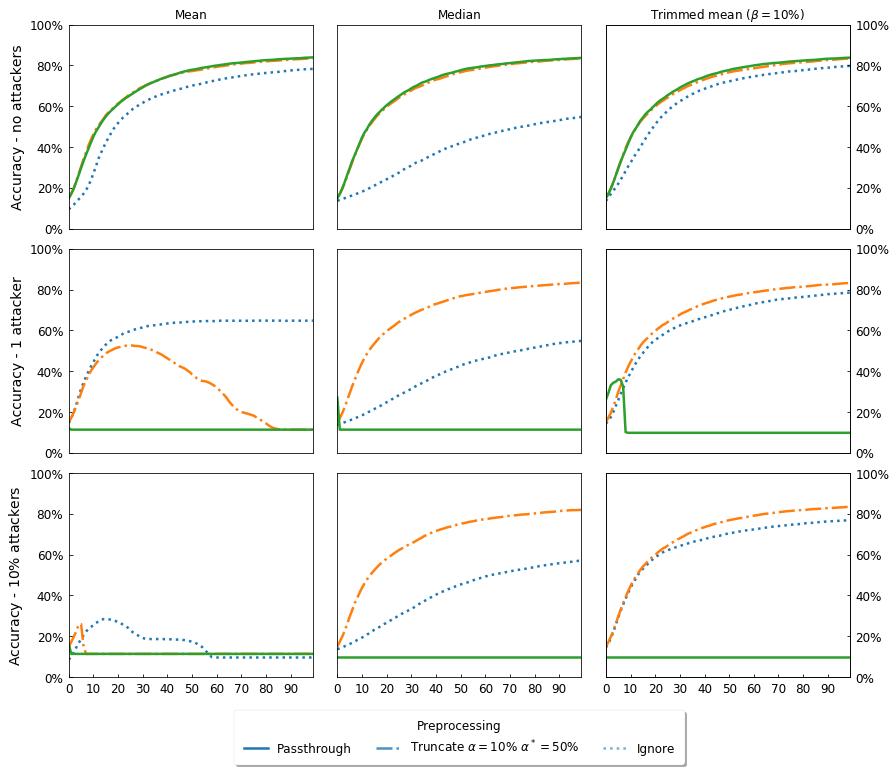

In [39]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mpl.rcParams['lines.linewidth'] = 2.5

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr', 1, 'all', 'delta_to_zero', 10, 1000000    
fig, axs = plt.subplots(3, 3, figsize=(14, 12), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean ($\beta=10\%$)')

#ax3.yaxis.set_ticks_position('right')

#axT = ax1.secondary_yaxis("right")
#axT.tick_params(axis="y", direction="out", length=8)

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('Accuracy - no attackers')
ax1.set_ylim(0, 1)#(0.85, 1)

ax4.set_ylabel(r'Accuracy - 1 attacker')
ax4.set_ylim(0, 1)

ax7.set_ylabel(r'Accuracy - $10\%$ attackers')
ax7.set_ylim(0, 1)

ax7.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax9.xaxis.set_major_locator(MaxNLocator(integer=True))
for i in range(3):
    a_l = axs[i][0]
    a_r = axs[i][2].twinx()
    a_r.tick_params(direction="in")
    a_r.set_ylim(*a_l.get_ylim())
    a_l.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
for i, aggr in enumerate(['mean', 'median', 't_mean_10']):
    exp1 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1]', 0.6, ':'), #'#AAAAAA', ':',), #'#00FF00', ':'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}', f'{aggr}[U]', 0.8, '-.'), #'#666666', '-.',), #'#009900', '-.'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}', f'{aggr}[W]',  1, '-'), #'#000000', '-',), #'#006600', '-'),
    ]
    plot_range(exp1, axs[0][i], 0, 800, metric_idx=1)

    exp2 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
    ]
    plot_range(exp2, axs[1][i], 0, 800, metric_idx=1)
    
    exp3 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
    ]
    plot_range(exp3, axs[2][i], 0, 800, metric_idx=1)
#lines = ax1.get_legend_handles_labels()[0]
color = plt.get_cmap("tab10")(0)
ax8.legend(handles=(plt.Line2D([0], [0], color=color, linestyle='-'),
                    plt.Line2D([0], [0], color=color, alpha=0.8, linestyle='-.'),
                    plt.Line2D([0], [0], color=color, alpha=0.6, linestyle=':')),     # The line objects
           labels=['Passthrough', r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
           borderpad=0.8,    # Small spacing around legend box
           title="Preprocessing",  # Title for the legend
           #mode='expand',
           #numpoints=1,# loc=4,
           bbox_to_anchor=(0.5,-0.46),
           fancybox=True, shadow=True,
           ncol=3
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)
for ax in [ax2, ax3, ax5, ax6, ax8, ax9]:
    ax.tick_params(axis='y', which='both', length=0)
    
fig.savefig('filename.pdf', format='pdf')

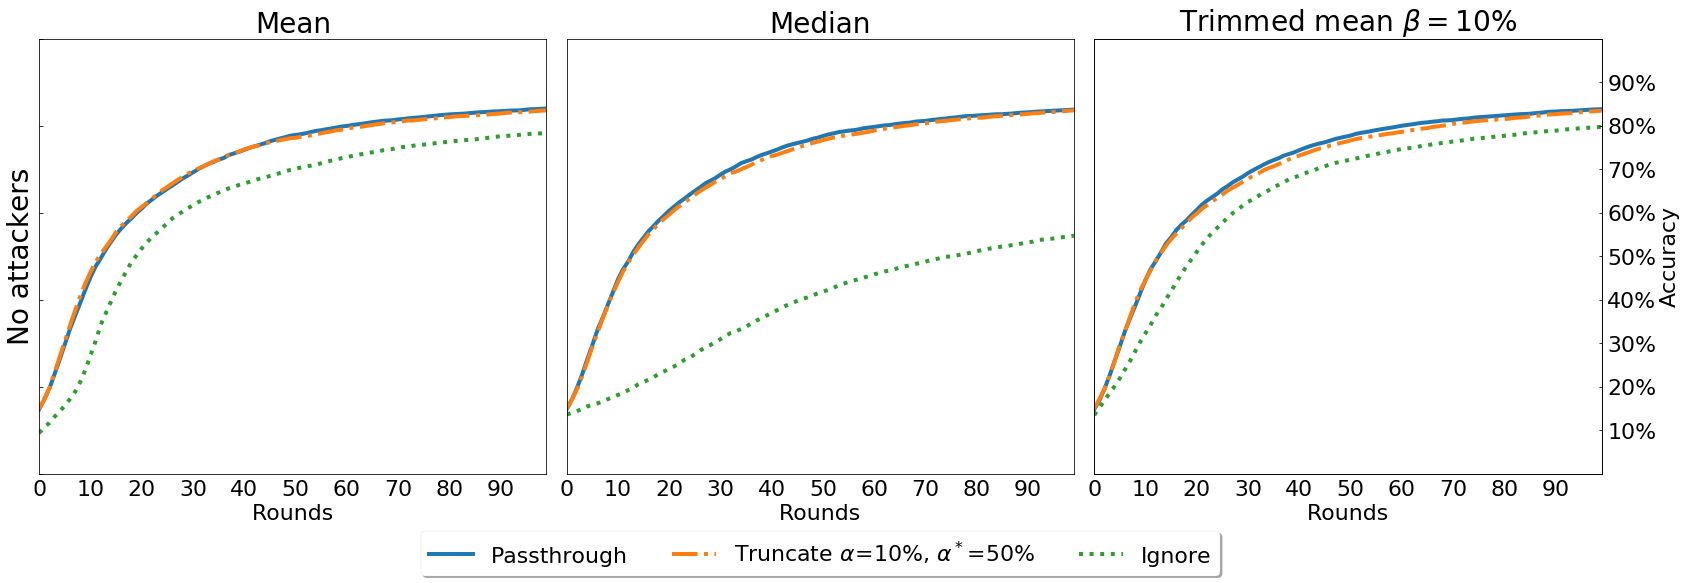

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
mpl.rcParams['lines.linewidth'] = 4

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr8-no-dropout', 1, 'all', 'y_flip', 10, 1000000   
fig, axs = plt.subplots(1, 3, figsize=(28, 8), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean $\beta=10\%$')

#ax3.yaxis.set_ticks_position('right')

#axT = ax1.secondary_yaxis("right")
#axT.tick_params(axis="y", direction="out", length=8)

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('No attackers')
ax1.set_ylim(0, 1)

for i in range(3):
    axs[i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[i].set_xticks(range(10, 100, 10))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax9.xaxis.set_major_locator(MaxNLocator(integer=True))
# for i in range(3):
a_l = axs[0]
a_r = axs[2].twinx()
a_r.tick_params(direction="in")
a_r.set_ylim(*a_l.get_ylim())
a_l.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_l.tick_params(labelleft=False)

a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_r.set_yticks([_ / 10 for _ in range(1, 10)])
    
for i, aggr in enumerate(['mean', 'median', 't_mean_10']):
    exp1 = [
        (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}', f'{aggr}[W]',  1, '-'), #'#000000', '-',), #'#006600', '-'),
        (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}', f'{aggr}[U]', 0.8, '-.'), #'#666666', '-.',), #'#009900', '-.'),
        (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1]', 0.6, ':'), #'#AAAAAA', ':',), #'#00FF00', ':'),

            

            
    ]
    plot_range(exp1, axs[i], 0, 800, metric_idx=1)

#     exp2 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_30_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
#     ]
#     plot_range(exp2, axs[1][i], 0, 800, metric_idx=1)
    
#     exp3 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_30_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
#     ]
#     plot_range(exp3, axs[2][i], 0, 800, metric_idx=1)
# #lines = ax1.get_legend_handles_labels()[0]
color = plt.get_cmap("tab10")(0)
ax2.legend(
#     handles=(plt.Line2D([0], [0], color=color, linestyle='-'),
#                     plt.Line2D([0], [0], color=color, alpha=0.8, linestyle='-.'),
#                     plt.Line2D([0], [0], color=color, alpha=0.6, linestyle=':')),     # The line objects
           labels=['Passthrough', 'Truncate $\\alpha\\!=\\!10\\%$, $\\alpha^*\\!=\\!50\\%$', 'Ignore'],#r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
#            borderpad=0.8,    # Small spacing around legend box
#            title="Preprocessing",  # Title for the legend
#            mode='expand',
#            numpoints=1,# loc=4,
     fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=3
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3]:#, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)
for ax in [ax2, ax3]:#, ax5, ax6, ax8, ax9]:
    ax.tick_params(axis='y', which='both', length=0)

fig.savefig('no_attackers_2.pdf', format='pdf', bbox_inches='tight')

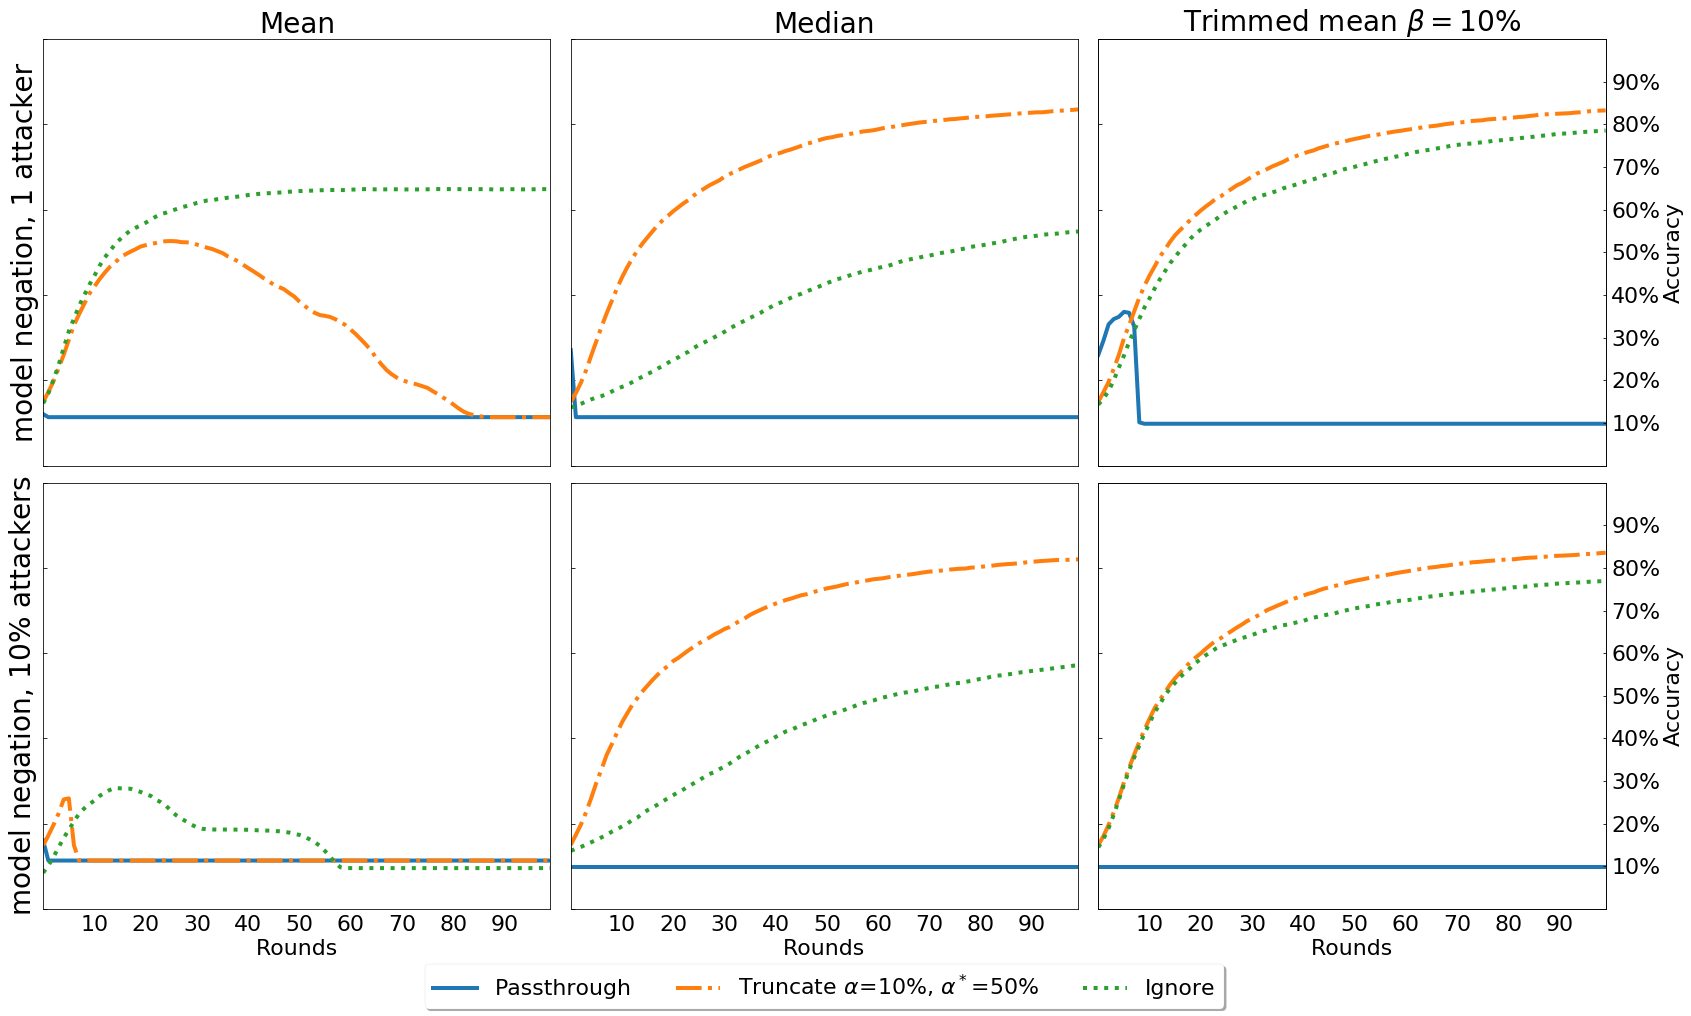

In [49]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr8-no-dropout', 1, 'all', 'delta_to_zero', 10, 1000000   
fig, axs = plt.subplots(2, 3, figsize=(28, 16), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3), (ax4, ax5, ax6) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean $\beta=10\%$')

#ax3.yaxis.set_ticks_position('right')

#axT = ax1.secondary_yaxis("right")
#axT.tick_params(axis="y", direction="out", length=8)

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('model negation, 1 attacker')
ax1.set_ylim(0, 1)#(0.85, 1)

ax4.set_ylabel(r'model negation, $10\%$ attackers')
ax4.set_ylim(0, 1)

# ax7.set_ylabel(r'Accuracy - $10\%$ attackers')
# ax7.set_ylim(0, 1)

# ax7.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax9.xaxis.set_major_locator(MaxNLocator(integer=True))

for i in range(3):
    axs[1][i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[1][i].set_xticks(range(10, 100, 10))
    
for i in range(2):   
    a_l = axs[i][0]
    a_r = axs[i][2].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])
    
    plt.setp(ax3.get_yticklabels(), visible=True)


for i, aggr in enumerate(['mean', 'median', 't_mean_10']):
#     exp1 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1]', 0.6, ':'), #'#AAAAAA', ':',), #'#00FF00', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}', f'{aggr}[U]', 0.8, '-.'), #'#666666', '-.',), #'#009900', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}', f'{aggr}[W]',  1, '-'), #'#000000', '-',), #'#006600', '-'),
#     ]
#     plot_range(exp1, axs[0][i], 0, 800, metric_idx=1)

    exp2 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
    ]
    plot_range(exp2, axs[0][i], 0, 800, metric_idx=1)
    
    exp3 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
    ]
    plot_range(exp3, axs[1][i], 0, 800, metric_idx=1)
#lines = ax1.get_legend_handles_labels()[0]
color = plt.get_cmap("tab10")(0)
ax5.legend(
#     handles=(plt.Line2D([0], [0], color=color, linestyle='-'),
#                     plt.Line2D([0], [0], color=color, alpha=0.8, linestyle='-.'),
#                     plt.Line2D([0], [0], color=color, alpha=0.6, linestyle=':')),     # The line objects
           labels=['Passthrough', 'Truncate $\\alpha\\!=\\!10\\%$, $\\alpha^*\\!=\\!50\\%$', 'Ignore'],#r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
#            borderpad=0.8,    # Small spacing around legend box
#            title="Preprocessing",  # Title for the legend
#            mode='expand',
#            numpoints=1,# loc=4,
     fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=3
)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)
# for ax in [ax2, ax3, ax5, ax6, ax8, ax9]:
#     ax.tick_params(axis='y', which='both', length=0)

fig.savefig('model_negation_attack.pdf', format='pdf', bbox_inches='tight')

## four rows delta_to_zero + y_flip

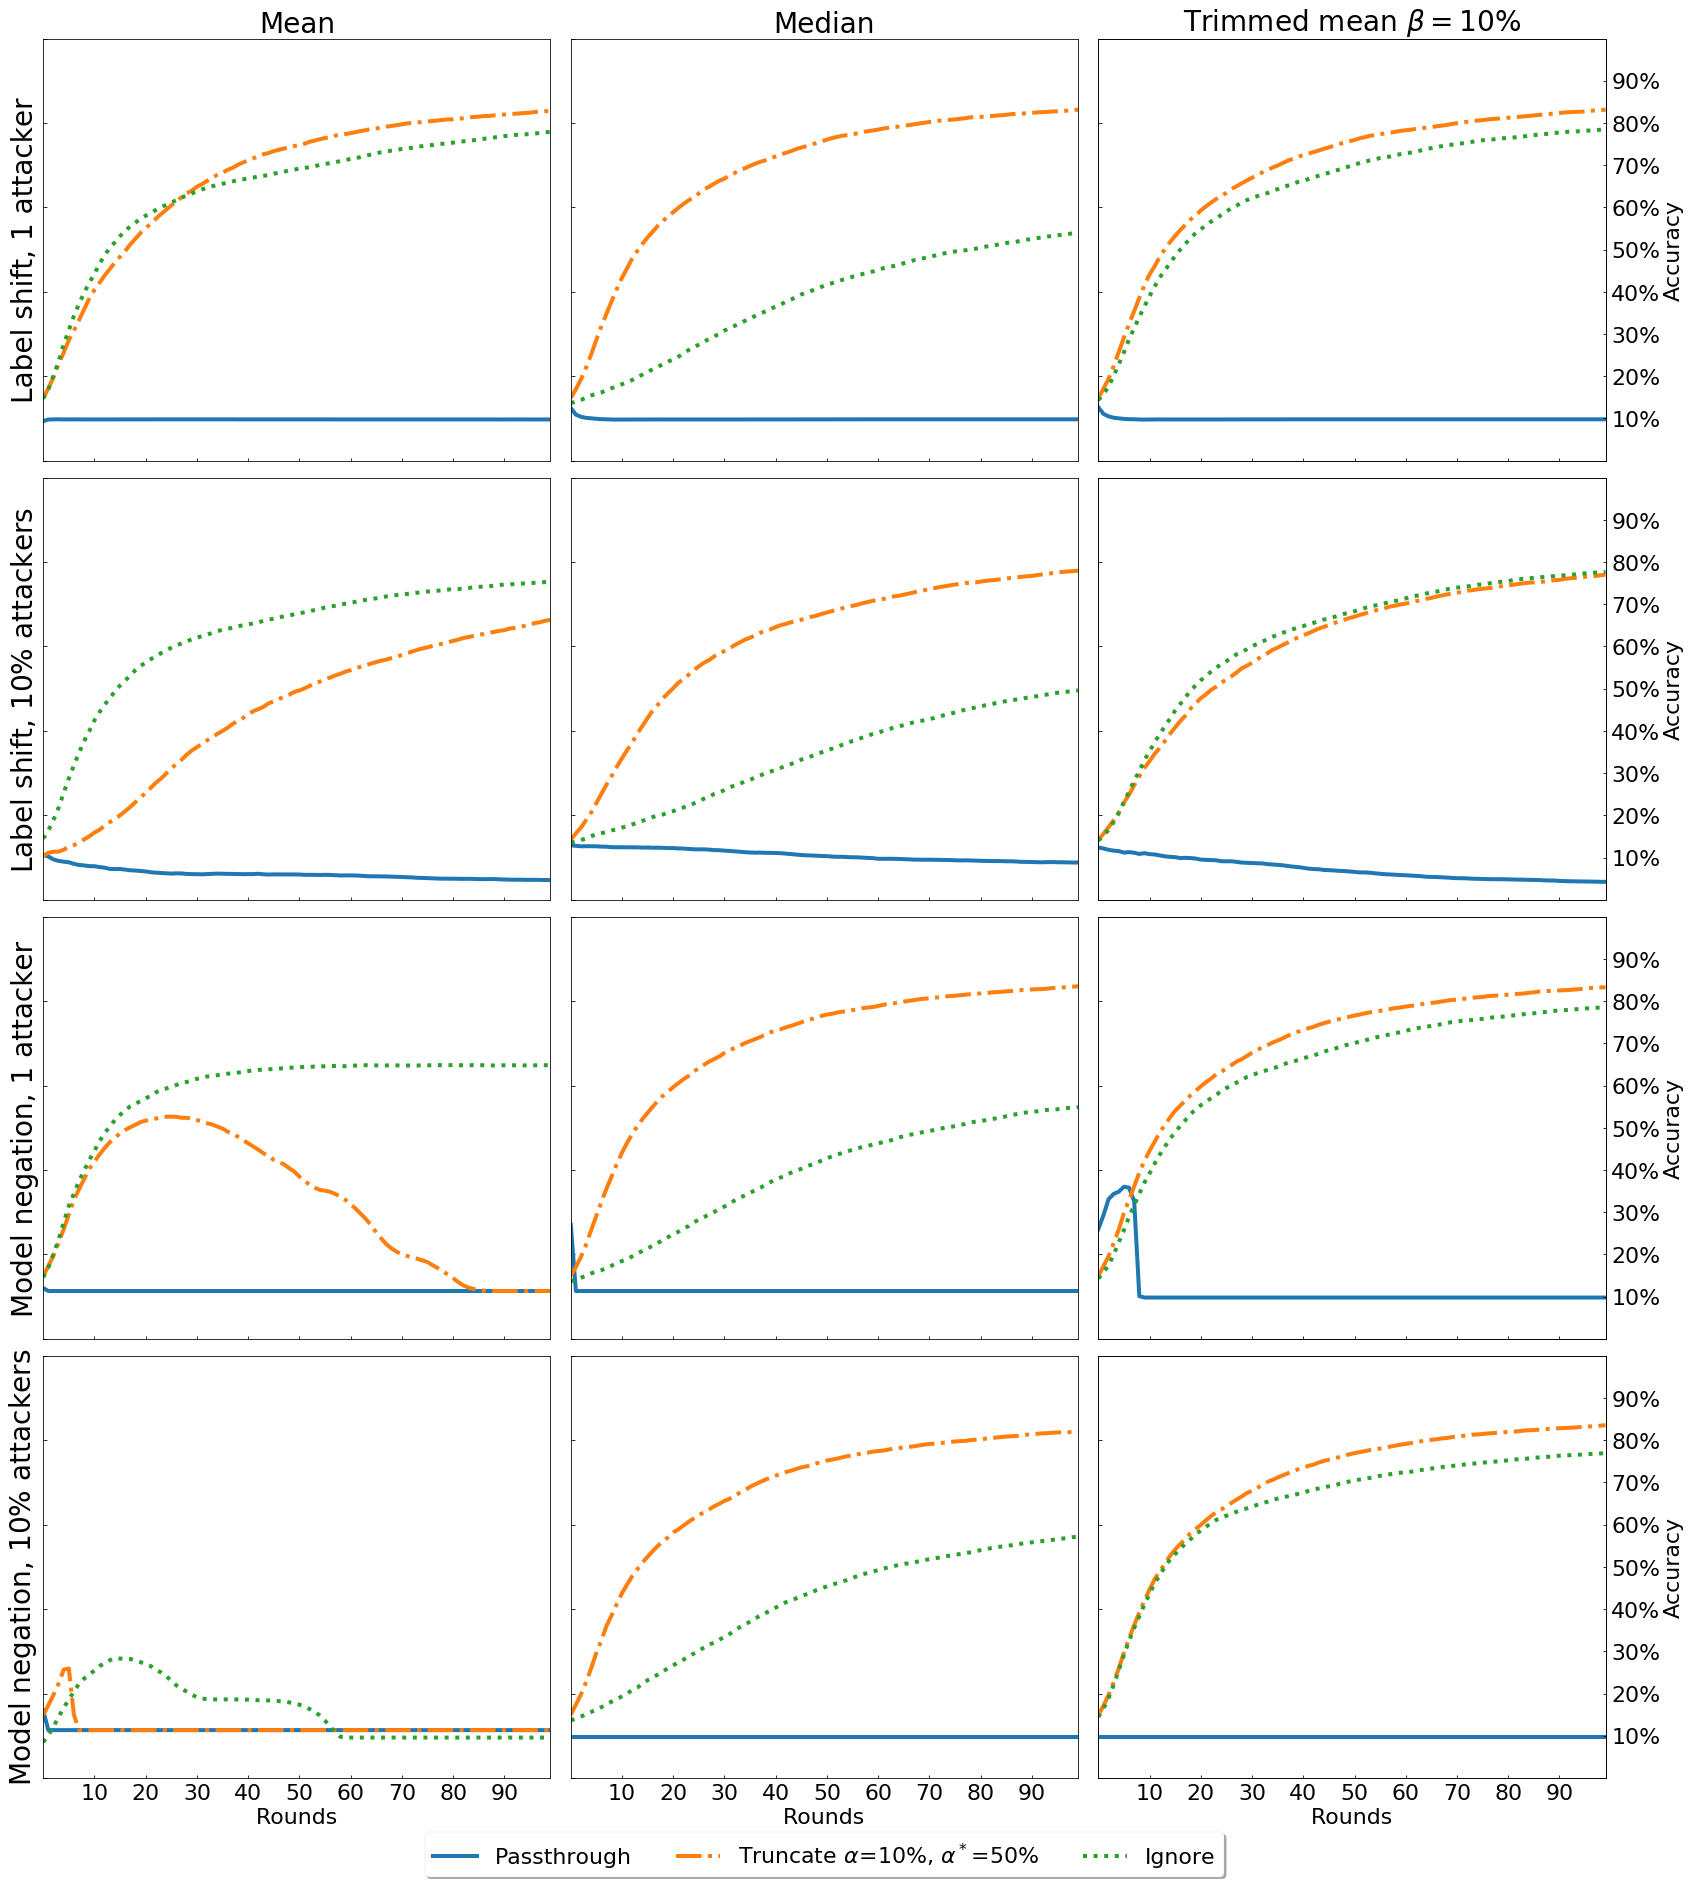

In [50]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr8-no-dropout', 1, 'all', 'delta_to_zero', 10, 1000000   
fig, axs = plt.subplots(4, 3, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12) = axs

right_axs = (ax3, ax6, ax9, ax12)
bottom_axs = (ax10, ax11, ax12)

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean $\beta=10\%$')

#ax3.yaxis.set_ticks_position('right')

#axT = ax1.secondary_yaxis("right")
#axT.tick_params(axis="y", direction="out", length=8)

#plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('Label shift, 1 attacker')
ax1.set_ylim(0, 1)#(0.85, 1)

ax4.set_ylabel('Label shift, $10\%$ attackers')
ax4.set_ylim(0, 1)

ax7.set_ylabel('Model negation, 1 attacker')
ax7.set_ylim(0, 1)#(0.85, 1)

ax10.set_ylabel('Model negation, $10\%$ attackers')
ax10.set_ylim(0, 1)

# ax7.set_ylabel(r'Accuracy - $10\%$ attackers')
# ax7.set_ylim(0, 1)

# ax7.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax9.xaxis.set_major_locator(MaxNLocator(integer=True))

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=MEDIUM_SIZE)
    axs[-1][i].set_xticks(range(10, 100, 10))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=MEDIUM_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])
    
#     plt.setp(ax3.get_yticklabels(), visible=True)


for i, aggr in enumerate(['mean', 'median', 't_mean_10']):
#     exp1 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1]', 0.6, ':'), #'#AAAAAA', ':',), #'#00FF00', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}', f'{aggr}[U]', 0.8, '-.'), #'#666666', '-.',), #'#009900', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}', f'{aggr}[W]',  1, '-'), #'#000000', '-',), #'#006600', '-'),
#     ]
#     plot_range(exp1, axs[0][i], 0, 800, metric_idx=1)

    for j, attack_type in enumerate(['y_flip', 'delta_to_zero']):
        exp_f1 = [
                (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
                (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),
                (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
        ]
        plot_range(exp_f1, axs[j*2][i], 0, 800, metric_idx=1)

        exp_alpha_10 = [
                (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
                (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),
                (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),
        ]
        plot_range(exp_alpha_10, axs[j*2 + 1][i], 0, 800, metric_idx=1)
#lines = ax1.get_legend_handles_labels()[0]
# color = plt.get_cmap("tab10")(0)
ax11.legend(
#     handles=(plt.Line2D([0], [0], color=color, linestyle='-'),
#                     plt.Line2D([0], [0], color=color, alpha=0.8, linestyle='-.'),
#                     plt.Line2D([0], [0], color=color, alpha=0.6, linestyle=':')),     # The line objects
           labels=['Passthrough', 'Truncate $\\alpha\\!=\\!10\\%$, $\\alpha^*\\!=\\!50\\%$', 'Ignore'],#r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
#            borderpad=0.8,    # Small spacing around legend box
#            title="Preprocessing",  # Title for the legend
#            mode='expand',
#            numpoints=1,# loc=4,
     fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.26),
           fancybox=True, 
            shadow=True,
           ncol=3
)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

# for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
#     ax.tick_params(axis='x', which='both', length=0)
# for ax in [ax2, ax3, ax5, ax6, ax8, ax9]:
#     ax.tick_params(axis='y', which='both', length=0)

fig.savefig('attackers_2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

SMALL_SIZE = 12
MEDIUM_SIZE = 24
BIGGER_SIZE = 32

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=38)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr8', 1, 'all', 'delta_to_zero', 30, 1000000    
fig, axs = plt.subplots(1, 3, figsize=(28, 8), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3) = axs

ax1.set_title('Mean')
ax2.set_title('Median')
ax3.set_title(r'Trimmed mean ($\beta=10\%$)')

#ax3.yaxis.set_ticks_position('right')

#axT = ax1.secondary_yaxis("right")
#axT.tick_params(axis="y", direction="out", length=8)

plt.setp(ax3.get_yticklabels(), visible=True)

ax1.set_ylabel('Accuracy - no attackers')
ax1.set_ylim(0.85, 1)

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax8.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax9.xaxis.set_major_locator(MaxNLocator(integer=True))
# for i in range(3):
a_l = axs[0]
a_r = axs[2].twinx()
a_r.tick_params(direction="in")
a_r.set_ylim(*a_l.get_ylim())
a_l.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    
for i, aggr in enumerate(['mean', 'median', 't_mean_10']):
    exp1 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1]', 0.6, ':'), #'#AAAAAA', ':',), #'#00FF00', ':'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_t_10_cpr_{cpr}', f'{aggr}[U]', 0.8, '-.'), #'#666666', '-.',), #'#009900', '-.'),

            (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}', f'{aggr}[W]',  1, '-'), #'#000000', '-',), #'#006600', '-'),
    ]
    plot_range(exp1, axs[i], 0, 800, metric_idx=1)

#     exp2 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_30_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_f1_10000000', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
#     ]
#     plot_range(exp2, axs[1][i], 0, 800, metric_idx=1)
    
#     exp3 = [
#             (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), #'#AAAAAA', ':',), #'#EE0303', ':'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_t_30_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[U] byz', 0.8, '-.'), #'#666666', '-.',),  #'#DF3333', '-.'),

#             (f'experiments/{experiment}/seed_{seed}/{aggr}_w_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[W] byz', 1, '-'), #'#000000', '-',), #'#B30000', '-'),
#     ]
#     plot_range(exp3, axs[2][i], 0, 800, metric_idx=1)
# #lines = ax1.get_legend_handles_labels()[0]
color = plt.get_cmap("tab10")(0)
ax2.legend(handles=(plt.Line2D([0], [0], color=color, linestyle='-'),
                    plt.Line2D([0], [0], color=color, alpha=0.8, linestyle='-.'),
                    plt.Line2D([0], [0], color=color, alpha=0.6, linestyle=':')),     # The line objects
           labels=['Passthrough', r'Truncate $\alpha=10\%$ $\alpha^*=50\%$', 'Ignore'],   # The labels for each line
           loc="lower center",   # Position of legend
           borderpad=0.8,    # Small spacing around legend box
#            title="Preprocessing",  # Title for the legend
           #mode='expand',
           #numpoints=1,# loc=4,
           bbox_to_anchor=(0.5,-0.32),
           fancybox=True, shadow=True,
           ncol=3
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

for ax in [ax1, ax2, ax3]:#, ax4, ax5, ax6]:
    ax.tick_params(axis='x', which='both', length=0)
for ax in [ax2, ax3]:#, ax5, ax6, ax8, ax9]:
    ax.tick_params(axis='y', which='both', length=0)

fig.savefig('no_attackers.pdf', format='pdf', bbox_inches='tight')